# V.1 Exploring the green reds
### a) Scatterplot matrix of red wine data

In [100]:
import matplotlib.pyplot as plt
import random
import pandas as pd

wine_data = pd.read_csv('.\winequality-red.csv', sep=';')

print(wine_data.shape)

(1599, 12)


In [151]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    #select good&bad quality 
    good_wine = wine_data.loc[wine_data['quality'] >= good_threshold]
    bad_wine = wine_data.loc[wine_data['quality'] <= bad_threshold]
    wine_filter = pd.concat([good_wine, bad_wine])
    wine_filter['y'] = wine_filter.apply(lambda x: 1 if x['quality'] >= good_threshold else 0, axis=1)
    
    rows, cols = wine_data.shape
    fig, axes = plt.subplots(cols, cols, figsize=(20,20))
    plt.suptitle('Scatterplot matrix of red wine data', fontsize=26)
    
    for ax in axes.flat:
        # Hide labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        
    for i in range(cols):
        for j in range(cols):
            if (i != j):
                axes[i,j].plot(bad_wine.iloc[:,j], bad_wine.iloc[:,i], linestyle='none', marker='.', markersize='3', color='Purple')
                axes[i,j].plot(good_wine.iloc[:, j], good_wine.iloc[:,i], linestyle='none', marker='.', markersize='3', color='green')
    for i, col in enumerate(wine_data.columns):
        axes[i,i].text(0.5, 0.5, col, ha='center', va='center')
    plt.show
    if (save_plot == True):
        fig.savefig('./plot_scatter_matrix.png')
    return (wine_filter)

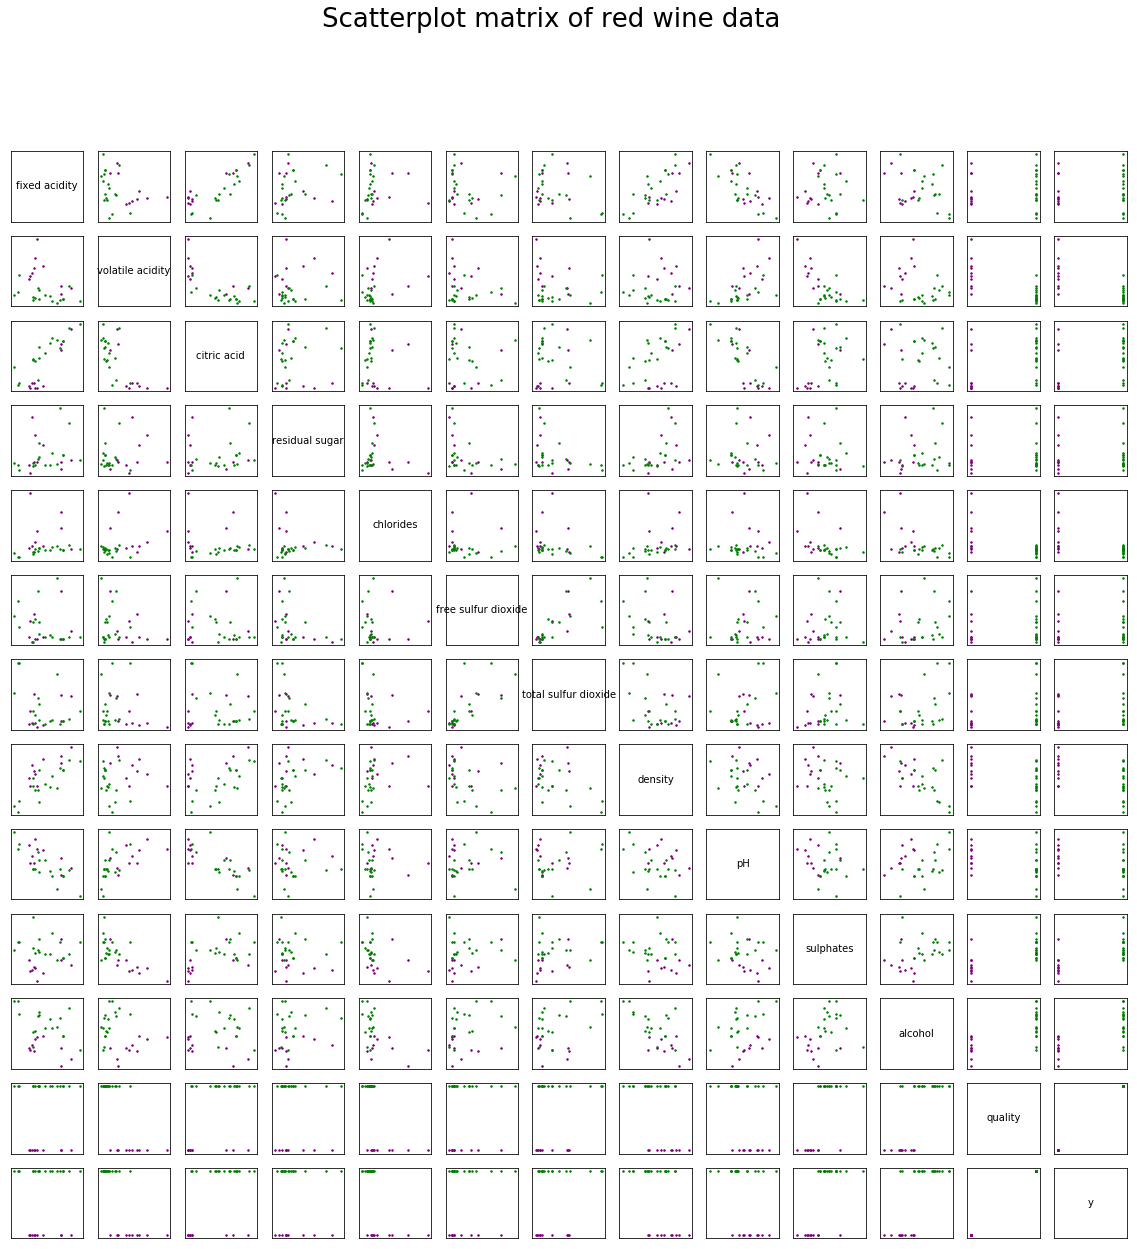

In [152]:
wine_data = plot_scatter_matrix(wine_data, 8, 3, True)

### b) ...



# V.2 Learning to perceptron
### a) Perceprton implementation

In [245]:
class Perceptron(object):
    def __init__(self, learningRate=0.01, n_iter=50, random_state=1):
        self.learningRate = learningRate
        self.random_state = random_state
        self.n_iter = n_iter
        self.errors_ = []
        self.weights = []
    def prediction(self, wine_data):
        x_rows, x_columns = wine_data.shape
        #Add 1 to the columns for the Bias Term
        x_columns = x_columns+1
        #Initialize all weights to a small random number  
        #weight[0] = the weight of the Bias Term
        for i in range(x_columns):
            self.weights.append(random.gauss(0.0, 0.001))
        print(self.weights)
        for i, row in wine_data.iterrows():
            activation = self.weights[0]
            for ind in range(x_columns-1):
                activation += self.weights[ind + 1] * row[ind]
                #print(self.weights[ind + 1], row[ind])
            print(1.0 if activation >= 0.0 else 0.0,activation, row['y'])

ppn = Perceptron(learningRate=0.1, n_iter=15)
ppn.prediction(wine_data)

[0.0005125756437238923, 0.0005982279808415181, 0.0007164359567613763, -0.0012595816292301743, -0.0002736367192323866, -0.0014196183440390142, 0.0013581749277696922, -0.000837295278759122, 7.976990847223531e-05, 0.0015064396142176794, 0.0007076419536530205, -0.000916521455863259, 0.0026201568416742297, -7.119593052338751e-05]
1.0 0.008100081395489645 1.0
1.0 0.01525543376778321 1.0
0.0 -0.0383329287037388 1.0
1.0 0.007435344989343003 1.0
1.0 0.011595617566126313 1.0
1.0 0.01432331717285148 1.0
1.0 0.015173232180481465 1.0
1.0 0.015173232180481465 1.0
1.0 0.0010759048589266992 1.0
1.0 0.02831725767063233 1.0
1.0 0.0159672203352717 1.0
1.0 0.01553615504669682 1.0
1.0 0.015329487617970233 1.0
1.0 0.018760415871932057 1.0
0.0 -0.01726410537010337 1.0
1.0 0.014726987227644808 1.0
1.0 0.016182204144761205 1.0
1.0 0.02311302875636053 1.0
0.0 -0.014451056356194706 0.0
1.0 0.0045371429333117665 0.0
1.0 0.0035402131034767406 0.0
1.0 0.016458710589371234 0.0
1.0 0.007520202324264343 0.0
1.0 0.0081